## Import
The following code imports the necessary code to run the code in the rest of this Colaboratory.

In [ ]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tf.__version__)

2.15.0


## Download Dataset
Open this link to know how to get cookies.txt https://www.kaggle.com/general/51898

In [ ]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

Dataset URL: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
License(s): unknown
... resuming from 18874368 bytes (3826599940 bytes left) ...
100% 3.58G/3.58G [02:10<00:00, 27.6MB/s]
100% 3.58G/3.58G [02:10<00:00, 29.3MB/s]


## Extract Data

In [ ]:
local_zip = '/content/fruits-fresh-and-rotten-for-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

## Split Dataset to Train, Test and Validation

In [ ]:
def make_dir(PATH):
  if not os.path.exists(PATH):
      os.mkdir(PATH)
      return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [ ]:
try:
    base_dir = '/content'
    fruit_dir = make_dir(os.path.join(base_dir, 'fruit-dataset'))
    train_dir = make_dir(os.path.join(fruit_dir, 'train'))
    validation_dir = make_dir(os.path.join(fruit_dir, 'val'))
    test_dir = make_dir(os.path.join(fruit_dir, 'test'))
    preview_dir = make_dir(os.path.join(fruit_dir, 'preview'))

    train_fresh_dir = make_dir(os.path.join(train_dir, 'Fresh Fruit'))
    train_rotten_dir = make_dir(os.path.join(train_dir, 'Rotten Fruit'))

    validation_fresh_dir = make_dir(os.path.join(validation_dir, 'Fresh Fruit'))
    validation_rotten_dir = make_dir(os.path.join(validation_dir, 'Rotten Fruit'))

    test_fresh_dir = make_dir(os.path.join(test_dir, 'Fresh Fruit'))
    test_rotten_dir = make_dir(os.path.join(test_dir, 'Rotten Fruit'))

except OSError:
    pass

In [ ]:
from PIL import Image

def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))

  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(TRAINING, filename))
        # img = Image.open(os.path.join(TRAINING, filename)).convert('L')
        # img.save(os.path.join(TRAINING, filename))
      else:
        copyfile(filepath, os.path.join(VALIDATION, filename))
        # img = Image.open(os.path.join(VALIDATION, filename)).convert('L')
        # img.save(os.path.join(VALIDATION, filename))

In [ ]:
dataset_train_dir = '/content/dataset/train'
dataset_test_dir = '/content/dataset/test'

fapples_train_dir = os.path.join(dataset_train_dir, 'freshapples')
fbananas_train_dir = os.path.join(dataset_train_dir, 'freshbanana')
foranges_train_dir = os.path.join(dataset_train_dir, 'freshoranges')
rapples_train_dir = os.path.join(dataset_train_dir, 'rottenapples')
rbananas_train_dir = os.path.join(dataset_train_dir, 'rottenbanana')
roranges_train_dir = os.path.join(dataset_train_dir, 'rottenoranges')

fapples_test_dir = os.path.join(dataset_test_dir, 'freshapples')
fbananas_test_dir = os.path.join(dataset_test_dir, 'freshbanana')
foranges_test_dir = os.path.join(dataset_test_dir, 'freshoranges')
rapples_test_dir = os.path.join(dataset_test_dir, 'rottenapples')
rbananas_test_dir = os.path.join(dataset_test_dir, 'rottenbanana')
roranges_test_dir = os.path.join(dataset_test_dir, 'rottenoranges')

print('fapples_train images = ', len(os.listdir(fapples_train_dir)))
print('fbananas_train images = ', len(os.listdir(fbananas_train_dir)))
print('foranges_train images = ', len(os.listdir(foranges_train_dir)))
print('rapples_train images = ', len(os.listdir(rapples_train_dir)))
print('rbananas_train images = ', len(os.listdir(rbananas_train_dir)))
print('roranges_train images = ', len(os.listdir(roranges_train_dir)))
print()
print('fapples_test images = ', len(os.listdir(fapples_test_dir)))
print('fbananas_test images = ', len(os.listdir(fbananas_test_dir)))
print('foranges_test images = ', len(os.listdir(foranges_test_dir)))
print('rapples_test images = ', len(os.listdir(rapples_test_dir)))
print('rbananas_test images = ', len(os.listdir(rbananas_test_dir)))
print('roranges_test images = ', len(os.listdir(roranges_test_dir)))

fapples_train images =  1693
fbananas_train images =  1581
foranges_train images =  1466
rapples_train images =  2342
rbananas_train images =  2224
roranges_train images =  1595

fapples_test images =  395
fbananas_test images =  381
foranges_test images =  388
rapples_test images =  601
rbananas_test images =  530
roranges_test images =  403


In [ ]:
SPLIT_SIZE = 0.67
split_data(fapples_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fbananas_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(foranges_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(rapples_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rbananas_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(roranges_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)

SPLIT_SIZE = 1.0
split_data(fapples_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fbananas_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(foranges_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(rapples_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rbananas_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(roranges_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)

In [ ]:
print(len(os.listdir('/content/fruit-dataset/train/Fresh Fruit/')))
print(len(os.listdir('/content/fruit-dataset/train/Rotten Fruit/')))
print()
print(len(os.listdir('/content/fruit-dataset/val/Fresh Fruit/')))
print(len(os.listdir('/content/fruit-dataset/val/Rotten Fruit/')))
print()
print(len(os.listdir('/content/fruit-dataset/test/Fresh Fruit/')))
print(len(os.listdir('/content/fruit-dataset/test/Rotten Fruit/')))

3178
4130

1562
2031

1164
1534


## Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2, #0.2, 0.5
    height_shift_range=0.2, #0.2, 0.5
    shear_range=0.2,
    zoom_range=[0.5, 1.0], # 0.2, 0.5, [0.5,1.0]
    rotation_range=90, #20, 40, 60, 90
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect' #nearest, reflect, wrap
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

## Preview Augmentation

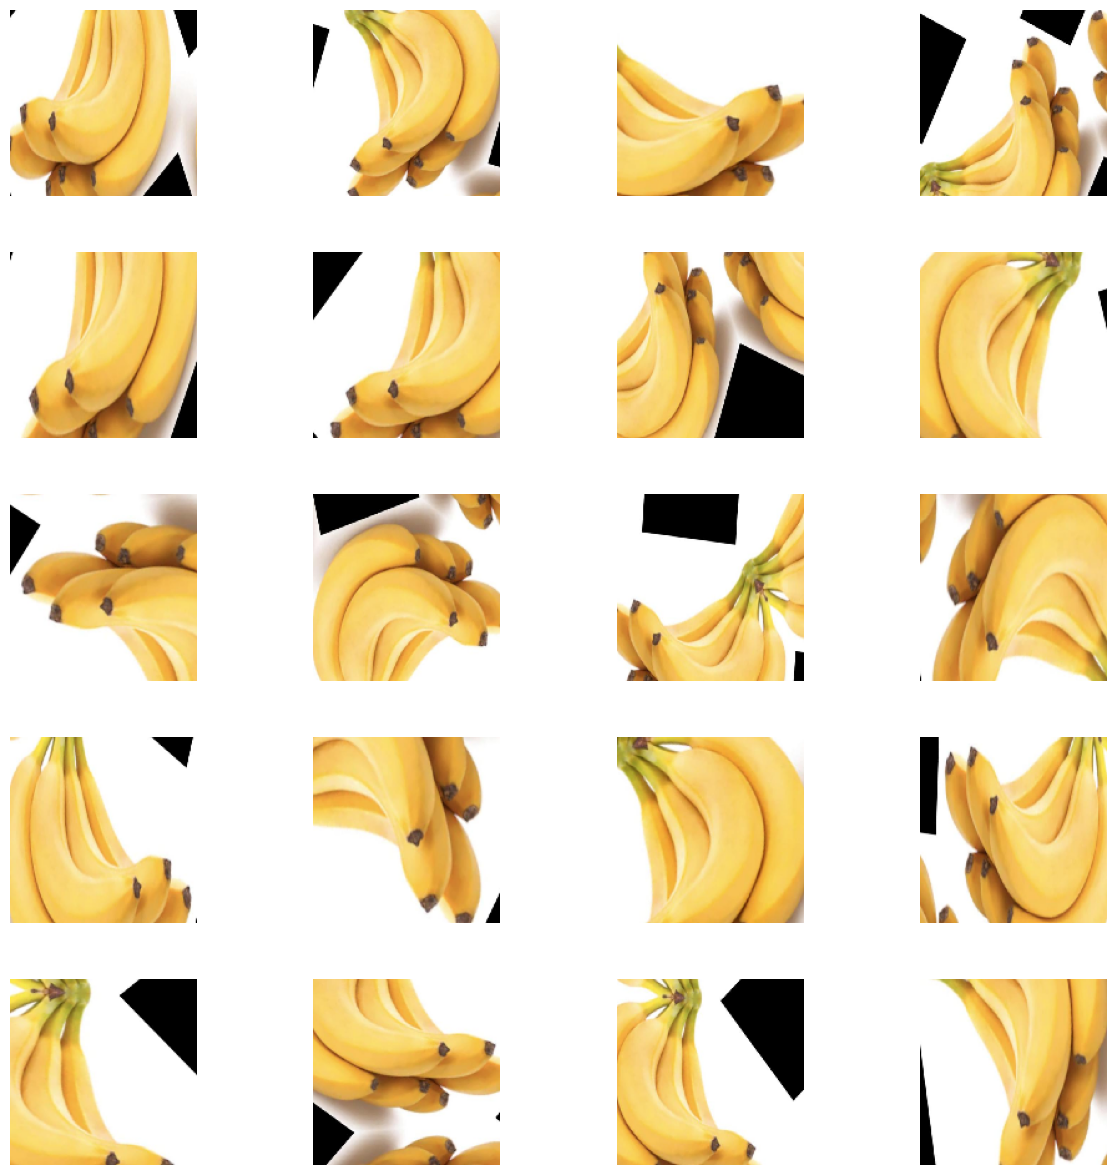

In [ ]:
path_aug = os.path.join(train_fresh_dir, os.listdir(train_fresh_dir)[-1])
img_augmentation = image.load_img(path_aug)
x_aug = image.img_to_array(img_augmentation)
x_aug = x_aug.reshape((1,) + x_aug.shape)

i = 0
for batch in train_datagen.flow(x_aug, batch_size=1, save_to_dir=preview_dir, save_prefix='fruit', save_format='jpeg'):
    i += 1
    if i >= 20:
        break

preview_img = os.listdir(preview_dir)

plt.figure(figsize=(15, 15))
for n in range(len(preview_img)):
  plt.subplot(5, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(os.path.join(preview_dir, preview_img[n]),
                            color_mode="rgb",
                            target_size=(150, 150),
                            interpolation="nearest"))
  plt.axis('off')
plt.show()

for fn in preview_img:
  os.system(f'rm {os.path.join(preview_dir, fn)}')

## Image Data Generator

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    shuffle = True,
                                                    target_size=(224,224),
                                                    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         color_mode="rgb",
                                                         shuffle = True,
                                                         target_size=(224,224),
                                                         class_mode='binary')

Found 7308 images belonging to 2 classes.
Found 3593 images belonging to 2 classes.


## Callbacks

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 98):
      print("\nReached 98% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

## Sequential Model (Baseline)

In [ ]:
#if you want to use tranfer learning, skip this cell
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

## Transfer Learning

In [ ]:
from tensorflow.keras.applications import Xception, VGG16, InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
import pandas as pd

pre_trained_model = InceptionV3(input_shape=(224,224,3),
                                 include_top=False)

#pre_trained_model = VGG16(input_shape=(224,224,3),
 #                         include_top=False)

#pre_trained_model = Xception(input_shape=(224,224,3),
   #                           include_top=False)

# pre_trained_model.layers.pop()


for layer in pre_trained_model.layers:
    layer.trainable = False

x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)
model.compile(optimizer='adam', #RMSprop(lr=0.0001), adam
              loss='binary_crossentropy',
              metrics=['accuracy'])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in pre_trained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

87910968/87910968 [==============================] - 4s 0us/step


,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer object at 0x7b16ffa05990>,input_2,False
1,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b1639943070>,conv2d_3,False
2,<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7b16399d1db0>,batch_normalization,False
3,<keras.src.layers.core.activation.Activation object at 0x7b17043438e0>,activation,False
4,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b16399432b0>,conv2d_4,False
...,...,...,...
306,<keras.src.layers.core.activation.Activation object at 0x7b15c80558d0>,activation_85,False
307,<keras.src.layers.merging.concatenate.Concatenate object at 0x7b15c820aa10>,mixed9_1,False
308,<keras.src.layers.merging.concatenate.Concatenate object at 0x7b15c80d2230>,concatenate_1,False
309,<keras.src.layers.core.activation.Activation object at 0x7b15c80d25c0>,activation_93,False


In [ ]:
train_len = 0
for foldername in os.listdir('/content/fruit-dataset/train'):
    train_len = train_len + len(os.listdir(os.path.join('/content/fruit-dataset/train',foldername)))

val_len = 0
for foldername in os.listdir('/content/fruit-dataset/val'):
    val_len = val_len + len(os.listdir(os.path.join('/content/fruit-dataset/val',foldername)))

print(train_len)
print(val_len)

7308
3593


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=10,
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=(val_len/32)
)

Epoch 1/10
228/228 [==============================] - 188s 787ms/step - loss: 2.4386 - accuracy: 0.8883 - val_loss: 0.1500 - val_accuracy: 0.9480
Epoch 2/10
228/228 [==============================] - 172s 756ms/step - loss: 0.1675 - accuracy: 0.9390 - val_loss: 0.1276 - val_accuracy: 0.9505
Epoch 3/10
228/228 [==============================] - 173s 757ms/step - loss: 0.1415 - accuracy: 0.9447 - val_loss: 0.1137 - val_accuracy: 0.9571
Epoch 4/10
228/228 [==============================] - 173s 759ms/step - loss: 0.1265 - accuracy: 0.9548 - val_loss: 0.1027 - val_accuracy: 0.9627
Epoch 5/10
228/228 [==============================] - 197s 865ms/step - loss: 0.1204 - accuracy: 0.9524 - val_loss: 0.1070 - val_accuracy: 0.9599
Epoch 6/10
228/228 [==============================] - 171s 749ms/step - loss: 0.1082 - accuracy: 0.9592 - val_loss: 0.0977 - val_accuracy: 0.9616
Epoch 7/10
228/228 [==============================] - 170s 746ms/step - loss: 0.1058 - accuracy: 0.9624 - val_loss: 0.0929 -

## Plot Loss and Accuracy

<Figure size 640x480 with 0 Axes>

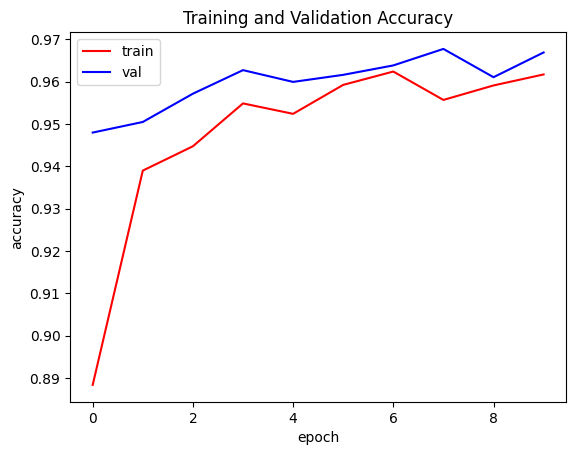

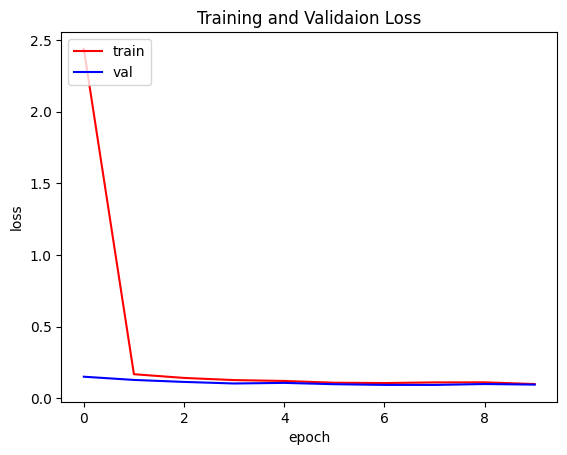

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

## Evaluate Model

Found 2698 images belonging to 2 classes.
2698/2698 [==============================] - 45s 16ms/step - loss: 0.0557 - accuracy: 0.9804
accuracy test:  0.9803557991981506
loss test:  0.05572051182389259


In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

# Define paths for saving the model and weights in Google Drive
save_model_path = "/content/drive/My Drive/model.h5"

# Save the model as a TensorFlow SavedModel
model.save(save_model_path)
print("Model saved as TensorFlow SavedModel to:", save_model_path)

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as TensorFlow SavedModel to: /content/drive/My Drive/model.h5


In [ ]:
model.save("model.h5")

In [ ]:
import cv2
import time
from PIL import Image, ImageDraw, ImageFont
import numpy as np

import tensorflow as tf

In [ ]:
from google.colab import files
files.download("model.h5")


## Predict Image

Saving muz.jpg to muz (1).jpg
Saving alma.jpg to alma (1).jpg
1/1 [==============================] - 0s 19ms/step


<ipython-input-32-e2892a6666c7>:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"


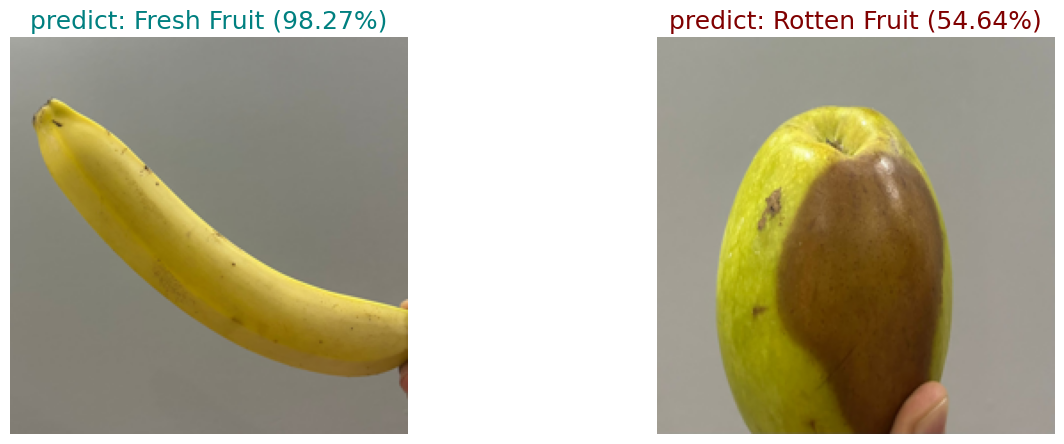

In [ ]:
from keras.utils import get_file
import pathlib
import cv2
import keras

model_predict = keras.models.load_model('model.h5')
model_predict.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode="rgb", target_size=(224, 224), interpolation="lanczos")
  # imgplot = plt.imshow(img)
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = model_predict.predict(images, batch_size=10)
  label = np.where(classes[0] > 0.5, 1,0)
  # print(label)
  if label == 0:
    image_name.append(fn)
    image_conf.append(1.0 - classes[0])
    predict_result.append('Fresh Fruit')
  else:
    image_name.append(fn)
    image_conf.append(classes[0])
    predict_result.append('Rotten Fruit')

plt.figure(figsize=(32, 32))
for n in range(len(image_name)):
  plt.subplot(5, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(224, 224), interpolation="bicubic"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  if predict_result[n] == 'Fresh Fruit':
    plt.title(title, fontsize=18, color='teal')
  else:
    plt.title(title, fontsize=18, color='maroon')

  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')